# Project Business Statistics: E-news Express

**Marks: 60**

## Define Problem Statement and Objectives

**Problem statement:**

The conversion rate for the current webpage of E-news Express has declined from the previous year. As a result, the new new subscriber count is down. Executives believe this is due to suboptimal webpage design which is causing a decrease in time spent on page. They are of the opinion that too many visitors are leaving the page too quickly to make a decision to subscribe.

**Objectives:**

Test the effectiveness of a new webpage design against the current page to determine if it increases conversion rate. 

To that end, we will answer the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?
2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
3. Does the converted status depend on the preferred language?
4. Is the time spent on the new page the same for the different language users?
    

## Import all the necessary libraries

In [102]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

## Reading the Data into a DataFrame

In [103]:
df = pd.read_csv('/Users/ryanlynch/Desktop/Data Science/Business Statistics/Case Study 2 - E-News Express/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [104]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [7]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [9]:
df.shape

(100, 6)

In [12]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df['language_preferred'].value_counts()

language_preferred
Spanish    34
French     34
English    32
Name: count, dtype: int64

In [57]:
df['converted'].value_counts()

converted
yes    54
no     46
Name: count, dtype: int64

In [105]:
nan_count = df.isnull().sum()
print('Number of null values:', nan_count)

Number of null values: user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64


### Univariate Analysis

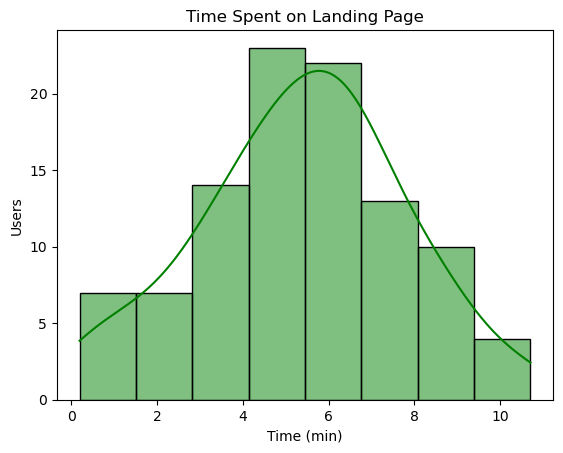

In [36]:
sns.histplot(data=df,x='time_spent_on_the_page',color='green',kde=True)
plt.xlabel('Time (min)')
plt.ylabel('Users')
plt.title('Time Spent on Landing Page', fontsize=12);

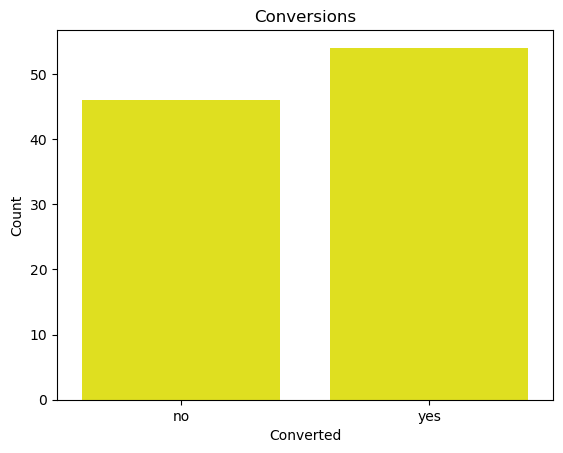

In [106]:
sns.countplot(data=df,x='converted',color='yellow')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.title('Conversions', fontsize=12);

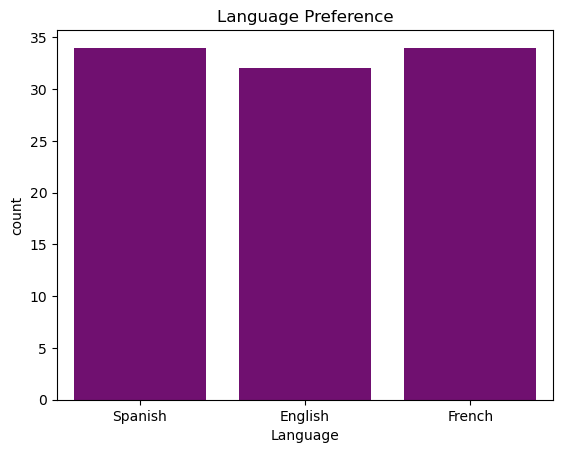

In [107]:
sns.countplot(data=df,x='language_preferred',color='purple')
plt.xlabel('Language')
plt.title('Language Preference', fontsize=12);

### Bivariate Analysis

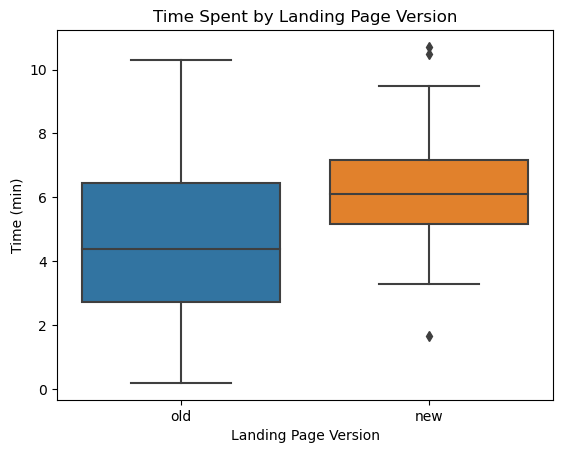

In [108]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.xlabel('Landing Page Version')
plt.ylabel('Time (min)')
plt.title('Time Spent by Landing Page Version', fontsize=12)
plt.show()

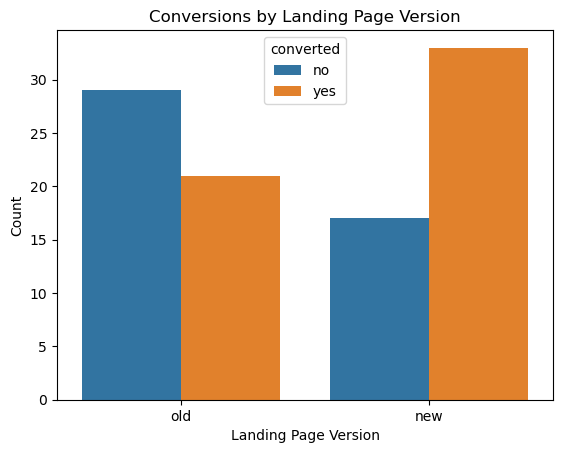

In [109]:
sns.countplot(data=df, x='landing_page', hue='converted')
plt.xlabel('Landing Page Version')
plt.ylabel('Count')
plt.title('Conversions by Landing Page Version', fontsize=12);

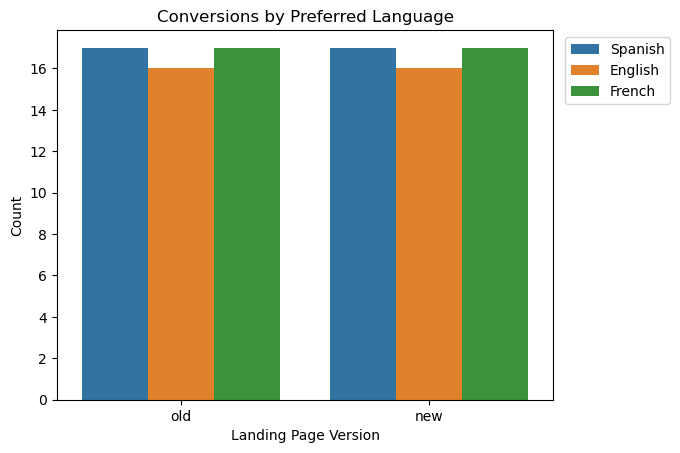

In [51]:
sns.countplot(data=df, x='landing_page', hue='language_preferred')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xlabel('Landing Page Version')
plt.ylabel('Count')
plt.title('Conversions by Preferred Language', fontsize=12);

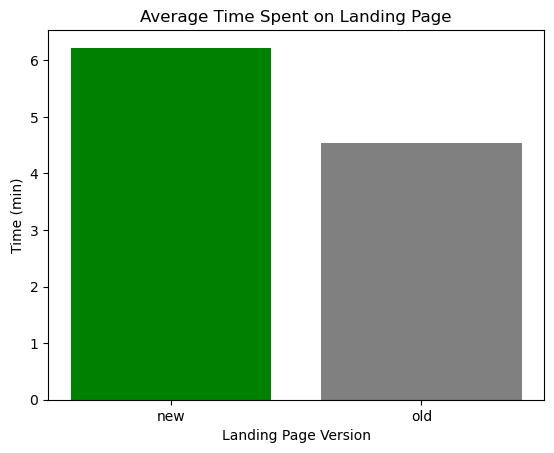

In [28]:
mean_time_spent = df.groupby('landing_page')['time_spent_on_the_page'].mean().reset_index()
plt.bar(mean_time_spent['landing_page'], mean_time_spent['time_spent_on_the_page'], color=['green', 'grey'])
plt.xlabel('Landing Page Version')
plt.ylabel('Time (min)')
plt.title('Average Time Spent on Landing Page',fontsize=12)
plt.show()

In [114]:
conversion_count = df.groupby('landing_page')['converted'].value_counts()
print(conversion_count)

landing_page  converted
new           yes          33
              no           17
old           no           29
              yes          21
Name: count, dtype: int64


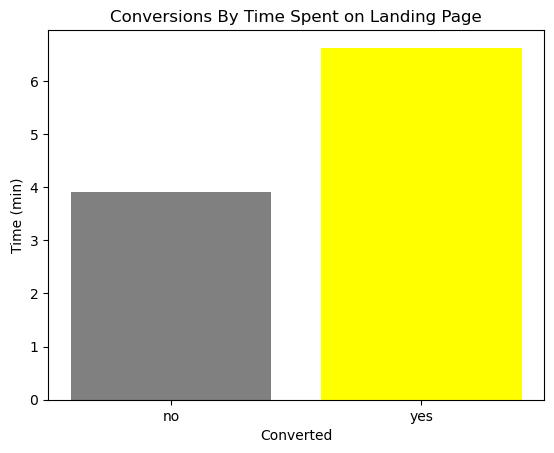

In [115]:
mean_time_spent = df.groupby('converted')['time_spent_on_the_page'].mean().reset_index()
plt.bar(mean_time_spent['converted'], mean_time_spent['time_spent_on_the_page'], color=['grey', 'yellow'])
plt.xlabel('Converted')
plt.ylabel('Time (min)')
plt.title('Conversions By Time Spent on Landing Page', fontsize=12)
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

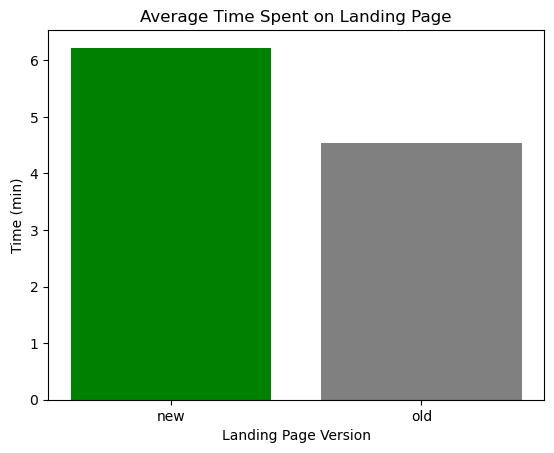

In [116]:
mean_time_spent = df.groupby('landing_page')['time_spent_on_the_page'].mean().reset_index()
plt.bar(mean_time_spent['landing_page'], mean_time_spent['time_spent_on_the_page'], color=['green', 'grey'])
plt.xlabel('Landing Page Version')
plt.ylabel('Time (min)')
plt.title('Average Time Spent on Landing Page',fontsize=12)
plt.show()

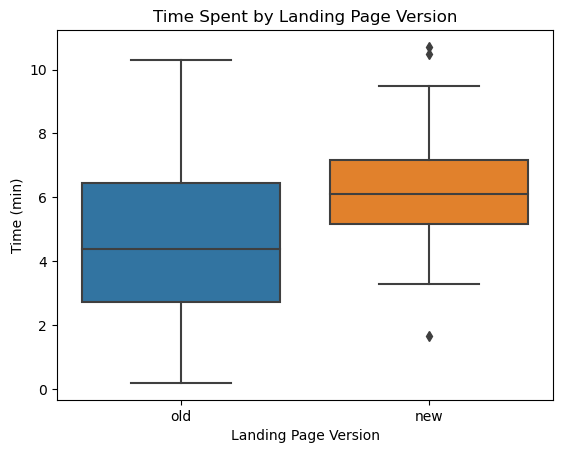

In [117]:
sns.boxplot(data=df, x='landing_page', y='time_spent_on_the_page')
plt.xlabel('Landing Page Version')
plt.ylabel('Time (min)')
plt.title('Time Spent by Landing Page Version', fontsize=12)
plt.show()

### Step 1: Define the null and alternate hypotheses

#### *H<sub>0</sub>*: &mu;<sub>1</sub> = &mu;<sub>2</sub> ####
#### *H<sub>a</sub>*: &mu;<sub>1</sub> < &mu;<sub>2</sub> ####

### Step 2: Select Appropriate test

We will use the Two-Sample T-Test.

### Step 3: Decide the significance level

As required by the executive team, we are using α = 0.05.

### Step 4: Collect and prepare data

In [118]:
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [119]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(time_spent_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


### Step 5: Calculate the p-value

In [120]:
from scipy.stats import ttest_ind 
test_stat, p_value =  ttest_ind(time_spent_new, time_spent_old, equal_var = True, alternative = 'two-sided')
level_of_significance = 0.05
print('The p-value is', p_value)

The p-value is 0.0002632247056190011


### Step 6: Compare the p-value with $\alpha$

In [121]:
if p_value < 0.05:
    print('Because the p-value,', round(p_value,5),'is less than the level of significance,', level_of_significance,'we reject the null hypothesis.')
else:
    print('Because the p-value,', round(p_value,5), 'is greater than the level of significance,', level_of_significance,'we fail to reject the null hypothesis.')

Because the p-value, 0.00026 is less than the level of significance, 0.05 we reject the null hypothesis.


### Step 7:  Draw inference

There is strong statistical evidence to reject the null hypothesis. In this context, evidence suggests that users spend more time on the new landing page than on the old. 

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

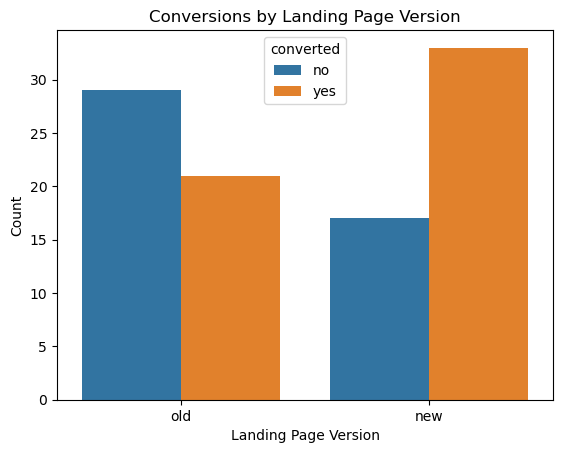

In [122]:
sns.countplot(data=df, x='landing_page', hue='converted')
plt.xlabel('Landing Page Version')
plt.ylabel('Count')
plt.title('Conversions by Landing Page Version', fontsize=12);

### Step 1: Define the null and alternate hypotheses

#### *H<sub>0</sub>*: Conversion rate for the new page and old page are equal.
#### *H<sub>a</sub>*: Conversion rate for the new page is greater than for the old page.

### Step 2: Select Appropriate test

We will use the Chi-Square Test.

### Step 3: Decide the significance level

As required by the executive team, we are using α = 0.05.

### Step 4: Collect and prepare data

In [59]:
contingency_table = pd.crosstab(df['landing_page'], df['converted'])  

contingency_table

converted,no,yes
landing_page,,
new,17,33
old,29,21


### Step 5: Calculate the p-value

In [123]:
from scipy.stats import chi2_contingency
chi2_stat, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.02730889175492232


### Step 6: Compare the p-value with $\alpha$

In [124]:
if p_value < 0.05:
    print('Because the p-value,', round(p_value,5),'is less than the level of significance,', level_of_significance,'we reject the null hypothesis.')
else:
    print('Because the p-value,', round(p_value,5), 'is greater than the level of significance,', level_of_significance,'we fail to reject the null hypothesis.')

Because the p-value, 0.02731 is less than the level of significance, 0.05 we reject the null hypothesis.


### Step 7:  Draw inference

There is strong statistical evidence to reject the null hypothesis. In this context, evidence suggests that the conversion rate is greater for the new landing page than the old. This affirms that the design of the new landing page is more effective in converting page visitors to subscribers.

## 3. Are the conversion and preferred language independent or related?

### Perform Visual Analysis

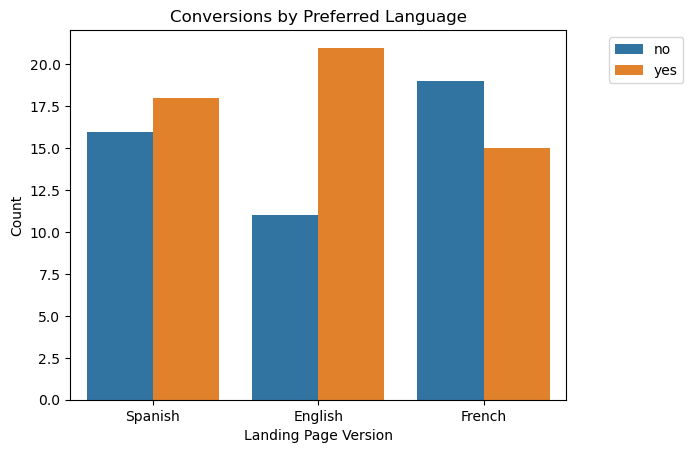

In [125]:
sns.countplot(data=df, x='language_preferred', hue='converted')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.xlabel('Landing Page Version')
plt.ylabel('Count')
plt.title('Conversions by Preferred Language', fontsize=12);

### Step 1: Define the null and alternate hypotheses

#### *H<sub>0</sub>*: Conversion rate and preferred language are independent.
#### *H<sub>a</sub>*: Conversion rate and preferred language are not independent.

### Step 2: Select Appropriate test

Again, we will use the Chi-Square Test.

### Step 3: Decide the significance level

As required by the executive team, we are using α = 0.05.

### Step 4: Collect and prepare data

In [126]:
contingency_table_2 = pd.crosstab(df['language_preferred'], df['converted'])  

contingency_table_2

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [127]:
from scipy.stats import chi2_contingency
chi2_stat, p_value, dof, exp_freq = chi2_contingency(contingency_table_2)
print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [129]:
if p_value < 0.05:
    print('Because the p-value,', round(p_value,5), 'is less than the level of significance,', level_of_signficicance, 'we reject the null hypothesis.')
else:
    print('Because the p-value,', round(p_value,5), 'is greater than the level of significance,', level_of_significance, 'we fail to reject the null hypothesis.')

Because the p-value, 0.21299 is greater than the level of significance, 0.05 we fail to reject the null hypothesis.


### Step 7:  Draw inference

There is insufficient statistical evidence to reject the null hypothesis. In this case, the conversion rate and preferred language are taken to be independent.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Analysis

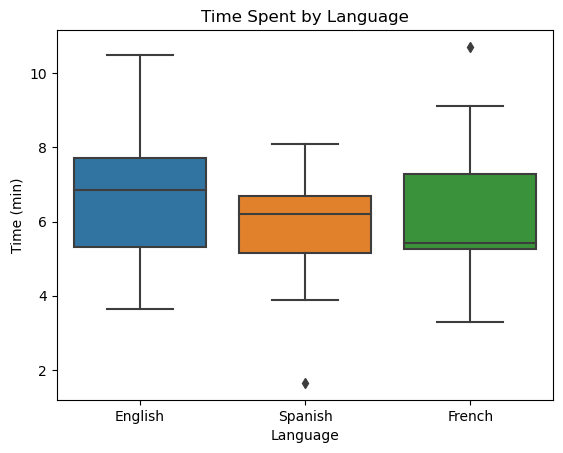

In [131]:
df_new = df[df['landing_page']=='new']
sns.boxplot(data=df_new, x='language_preferred', y='time_spent_on_the_page')
plt.xlabel('Language')
plt.ylabel('Time (min)')
plt.title('Time Spent by Language', fontsize=12)
plt.show()

### Step 1: Define the null and alternate hypotheses

#### *H<sub>0</sub>*: &mu;<sub>1</sub> = &mu;<sub>2</sub> = &mu;<sub>3</sub> ####
#### *H<sub>a</sub>*: At least one &mu;<sub>i</sub> is different from the others

### Step 2: Select Appropriate test

We will use the ANOVA Test.

### Step 3: Decide the significance level

As required by the executive team, we are using α = 0.05.

### Step 4: Collect and prepare data

In [133]:
time_spent_Spanish = df_new[df_new['language_preferred']=='Spanish']['time_spent_on_the_page']
time_spent_English = df_new[df_new['language_preferred']=='English']['time_spent_on_the_page']
time_spent_French = df_new[df_new['language_preferred']=='French']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [82]:
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(time_spent_Spanish,time_spent_English,time_spent_French)
print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [134]:
if p_value < 0.05:
    print('As the p-value,', round(p_value,5), 'is less than the level of signficance,', level_of_signficance, 'we reject the null hypothesis.')
else:
    print('As the p-value,', round(p_value,5), 'is greater than the level of signficance,', level_of_significance, 'we fail to reject the null hypothesis.')

As the p-value, 0.21299 is greater than the level of signficance, 0.05 we fail to reject the null hypothesis.


### Step 7:  Draw inference

There is insufficient statistical evidence to reject the null hypothesis. In this case, the average time spent on the new page is assumed to be equal across languages.

## Conclusion and Business Recommendations

**Business Recommendations:**

The new landing page has been shown to be substantially more effective than its predecessor. The average time spent on the new landing page is 37% higher (1 min 41 sec longer) than on the old page. The has led to 57% increase in the conversion rate (42% conversion rate - old; 66% conversion rate - new).  As such, the new page should replace the old as the default landing page. Additional A/B testing with future iterations should be done to further optimize.

**Conclusion:**

To summarize the answers to the business questions:

1. **Do the users spend more time on the new landing page than on the existing landing page?**
    
    *Yes, users spend 37% longer on the new page.*<br></br>

2. **Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?**

    *Yes, the conversion rate is 57% higher on the new page.*<br></br>

3. **Does the converted status depend on the preferred language?**

    *No, the conversion rate and preferred language appear to be independent.*<br></br>

4. **Is the time spent on the new page the same for the different language users?**

    *Yes, evidence suggests that the amount of time spent on the new page is the same across languages.*

___